# Data Preprocessing

- 0 coupe
- 1 pickup
- 2 sedan
- 3 suv
- 4 van

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HH9ECnEeBwB663gIBlcY")
project = rf.workspace("ana-lowela-l--lucas").project("vehicle-classification-sgcum")
version = project.version(11)
dataset = version.download("tensorflow")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to VEHICLE-CLASSIFICATION-11 in tensorflow:: 100%|██████████| 11983/11983 [00:02<00:00, 4748.72it/s]


### -

In [ ]:
import os
import numpy as np
import pandas as pd
# Define the path to the folder containing images and corresponding .txt files
folder_path_train = "/content/VEHICLE-CLASSIFICATION-11/train/"
folder_path_test = "/content/VEHICLE-CLASSIFICATION-11/test/"
df = pd.read_csv('/content/VEHICLE-CLASSIFICATION-11/train/_annotations.csv')
df_test = pd.read_csv('/content/VEHICLE-CLASSIFICATION-11/test/_annotations.csv')
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,04142_jpg.rf.60c4a33469a29c11a7244ef0369e5a33.jpg,260,194,suv,25,38,209,170
1,06209_jpg.rf.60c5f510889740f7feaaa7f2977835bf.jpg,640,480,pickup,15,205,632,471
2,01222_jpg.rf.60c99dc6d37915540106dd40d6dd51de.jpg,640,480,van,19,65,596,347
3,07117_jpg.rf.60d6cb04a7d6c0da5e775cfa6e7cd925.jpg,424,360,sedan,15,90,417,281
4,05243_jpg.rf.60e3bcaae25e2904694bf671cb8a9d92.jpg,112,84,van,2,15,110,83


In [ ]:
import cv2
import os
data = []
for filename in os.listdir(folder_path_train):
    if filename.endswith('.jpg'):
        image_path = os.path.join(folder_path_train, filename)
        image = cv2.imread(image_path)  #Reading the image
        data.append(image)


In [ ]:
labels = df['class']
len(labels)

10490

In [ ]:
data[0].shape

(151, 249, 3)

In [ ]:
labels[95]

'pickup'

In [ ]:
import numpy as np
for i in range(len(data)):
    data[i] = cv2.resize(data[i], (128, 128))

data_scaled_np = np.array(data)


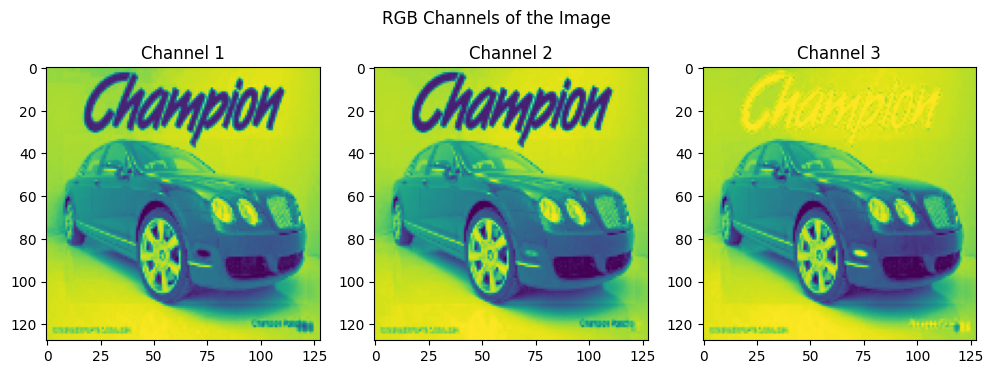

In [ ]:
import matplotlib.pyplot as plt

# Create dummy data for the image (you can replace this with your actual image data)
image_data = data[10489]

# Show subplots with three channels (shape: (1, 3))
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(image_data[:, :, i], cmap='viridis')  # Display each channel
    plt.title(f'Channel {i + 1}')

plt.suptitle('RGB Channels of the Image')
plt.show()

In [ ]:
# Converting Labels to integer values
class_names = [
    'coupe',
    'pickup',
    'sedan',
    'suv',
    'van'
]

class_encoded = {
    class_name : i for i, class_name in enumerate(class_names)
}
print(class_encoded)


{'coupe': 0, 'pickup': 1, 'sedan': 2, 'suv': 3, 'van': 4}


In [ ]:
labels_encoded = [class_encoded[i] for i in labels]

In [ ]:
labels[10489]

'pickup'

In [ ]:
labels_encoded[88]

1

In [ ]:
len(data)

10493

In [ ]:
len(labels_encoded)

10490

In [ ]:
# Scaling all images to 128,128,3
# Converting data and labels to numpy arrays
# import cv2
# import numpy as np
# for i in range(len(data)):
#     data[i] = cv2.resize(data[i], (128, 128))

data_scaled_np = np.array(data)
labels_encoded_np = np.array(labels_encoded)

In [ ]:
data_scaled_np= data_scaled_np[:10490]

In [ ]:
from sklearn.model_selection import train_test_split
# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled_np, labels_encoded_np, test_size=0.2, random_state=44)
# X_train = data_scaled_np
# y_train = labels_encoded_np

### Test

In [ ]:
import cv2
import os
data_test = []
for filename in os.listdir(folder_path_test):
    if filename.endswith('.jpg'):
        image_path = os.path.join(folder_path_test, filename)
        image = cv2.imread(image_path)  #Reading the image
        data_test.append(image)


In [ ]:
import numpy as np
for i in range(len(data_test)):
    data_test[i] = cv2.resize(data_test[i], (128, 128))

data_test_scaled_np = np.array(data_test)


In [ ]:
labels_test = df_test['class']
labels_test.head()

0    pickup
1       van
2       van
3       van
4       van
Name: class, dtype: object

In [ ]:
labels_encoded_test = [class_encoded[i] for i in labels_test]

In [ ]:
len(data_test_scaled_np)

503

In [ ]:
labels_encoded_test_np = np.array(labels_encoded_test)
len(labels_encoded_test_np)

503

In [ ]:
X_test = data_test_scaled_np
y_test = labels_encoded_test_np

### CNN

In [ ]:
X_train.shape

(8392, 128, 128, 3)

In [ ]:
from sklearn.model_selection import train_test_split
# # Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=44)

In [ ]:
y_train.shape

(8392,)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
# model_cnn = keras.Sequential([
#     keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     keras.layers.MaxPooling2D((2, 2)),
#     keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     keras.layers.MaxPooling2D((2, 2)),
#      keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
#       keras.layers.MaxPool2D(pool_size=(2, 2)),
#         keras.layers.Dropout(0.5),
#       keras.layers.BatchNormalization(),
#         keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding = 'same'),
#       keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
#         keras.layers.MaxPool2D(pool_size=(2, 2)),
#         keras.layers.Dropout(0.5),
#     keras.layers.Flatten(),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(5, activation='softmax')
# ])

model_cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    # keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding = 'same',),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    #  keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    # keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(5, activation='softmax')
])
# Compile the model
model_cnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),#0.00001
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import os
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), strides=(2,2)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), strides=(2,2)))
model.add(Activation('selu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(2,2)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('elu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('elu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))

early_stopping = EarlyStopping(monitor='val_accuracy', patience=2)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Train the model
from time import time
start_time = time()
model.fit(X_train,y_train ,validation_data=(X_val,y_val), epochs=1000,
              callbacks=[early_stopping])
cnn_time = time() - start_time

Epoch 1/1000
236/236 [==============================] - 5s 10ms/step - loss: 1.7932 - accuracy: 0.2242 - val_loss: 1.6163 - val_accuracy: 0.2583
Epoch 2/1000
236/236 [==============================] - 2s 9ms/step - loss: 1.6005 - accuracy: 0.2651 - val_loss: 1.6043 - val_accuracy: 0.2679
Epoch 3/1000
236/236 [==============================] - 2s 9ms/step - loss: 1.5920 - accuracy: 0.2733 - val_loss: 1.6151 - val_accuracy: 0.2012
Epoch 4/1000
236/236 [==============================] - 2s 9ms/step - loss: 1.5832 - accuracy: 0.2773 - val_loss: 1.6277 - val_accuracy: 0.2155


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import time


Time_cnn = time.time()
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

model_cnn.fit(X_train, y_train,
              epochs=1000,
              callbacks=[early_stopping],
              batch_size=250,
              validation_data=(X_val, y_val))

Time_cnn = time.time() - Time_cnn


Epoch 1/1000
31/31 [==============================] - 4s 72ms/step - loss: 1.6628 - accuracy: 0.2583 - val_loss: 1.6480 - val_accuracy: 0.2726
Epoch 2/1000
31/31 [==============================] - 2s 64ms/step - loss: 1.5927 - accuracy: 0.2745 - val_loss: 1.6594 - val_accuracy: 0.2726
Epoch 3/1000
31/31 [==============================] - 2s 64ms/step - loss: 1.5893 - accuracy: 0.2745 - val_loss: 1.6092 - val_accuracy: 0.2726
Epoch 4/1000
31/31 [==============================] - 2s 64ms/step - loss: 1.5840 - accuracy: 0.2745 - val_loss: 1.6004 - val_accuracy: 0.2726
Epoch 5/1000
31/31 [==============================] - 2s 64ms/step - loss: 1.5813 - accuracy: 0.2753 - val_loss: 1.6155 - val_accuracy: 0.2714
Epoch 6/1000
31/31 [==============================] - 2s 64ms/step - loss: 1.5727 - accuracy: 0.2779 - val_loss: 1.6005 - val_accuracy: 0.2690
Epoch 7/1000
31/31 [==============================] - 2s 64ms/step - loss: 1.5606 - accuracy: 0.2835 - val_loss: 1.6007 - val_accuracy: 0.2774

In [ ]:
print(  f"Time_cnn: {Time_cnn}")

Time_cnn: 234.21754217147827


In [ ]:
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test, y_test)

66/66 [==============================] - 0s 5ms/step - loss: 1.5966 - accuracy: 0.2898


In [ ]:
model_cnn.save('cnn_vehicle_classifier.keras')

### MLP

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import time
model_mlp = Sequential([
    keras.layers.Flatten(input_shape=(224, 224, 3)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)
Time_mlp = time.time()
model_mlp.fit(X_train, y_train, batch_size=512,
              epochs=1000,
              callbacks=[early_stopping])

Time_mlp = time.time() - Time_mlp


Epoch 1/1000
21/21 [==============================] - 2s 26ms/step - loss: 2889.2993 - accuracy: 0.2092
Epoch 2/1000
21/21 [==============================] - 1s 26ms/step - loss: 1009.6692 - accuracy: 0.2080
Epoch 3/1000
21/21 [==============================] - 1s 26ms/step - loss: 637.0164 - accuracy: 0.2069
Epoch 4/1000
21/21 [==============================] - 1s 25ms/step - loss: 571.7943 - accuracy: 0.2134
Epoch 5/1000
21/21 [==============================] - 1s 25ms/step - loss: 378.4915 - accuracy: 0.2046
Epoch 6/1000
21/21 [==============================] - 1s 25ms/step - loss: 494.5056 - accuracy: 0.2046
Epoch 7/1000
21/21 [==============================] - 1s 25ms/step - loss: 459.4462 - accuracy: 0.2106
Epoch 8/1000
21/21 [==============================] - 1s 25ms/step - loss: 234.4729 - accuracy: 0.2023
Epoch 9/1000
21/21 [==============================] - 1s 26ms/step - loss: 178.9231 - accuracy: 0.2182
Epoch 10/1000
21/21 [==============================] - 1s 26ms/step - l

In [ ]:
loss_mlp, accuracy_mlp = model_mlp.evaluate(X_test, y_test)

16/16 [==============================] - 0s 3ms/step - loss: 1.6228 - accuracy: 0.0934


In [ ]:
print(round(Time_mlp,2),"seconds")

15.79 seconds


# CNN + LSTM

In [ ]:
import tensorflow as tf
from tensorflow import keras

model_cnn_lstm = keras.Sequential([keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
     keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
      keras.layers.MaxPool2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
      keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding = 'same'),
      keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Reshape((-1, 64)),  # Reshape the output from Conv2D to be 3D as required by LSTM
    keras.layers.LSTM(64),  # Add LSTM layer with 64 units
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5,activation='softmax')
])

# Compile the model
model_cnn_lstm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import time


Time_cnn_lstm = time.time()
early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

model_cnn_lstm.fit(X_train, y_train,
              epochs=1000,
              callbacks=[early_stopping],
              batch_size=512)

Time_cnn_lstm = time.time() - Time_cnn_lstm


Epoch 1/1000
30/30 [==============================] - 20s 278ms/step - loss: 0.6946 - accuracy: 0.7467
Epoch 2/1000
30/30 [==============================] - 4s 129ms/step - loss: 0.4573 - accuracy: 0.8377
Epoch 3/1000
30/30 [==============================] - 4s 129ms/step - loss: 0.3869 - accuracy: 0.8974
Epoch 4/1000
30/30 [==============================] - 4s 129ms/step - loss: 0.3303 - accuracy: 0.9048
Epoch 5/1000
30/30 [==============================] - 4s 129ms/step - loss: 0.3377 - accuracy: 0.8970
Epoch 6/1000
30/30 [==============================] - 4s 129ms/step - loss: 0.2979 - accuracy: 0.9017
Epoch 7/1000
30/30 [==============================] - 4s 129ms/step - loss: 0.4853 - accuracy: 0.8904
Epoch 8/1000
30/30 [==============================] - 4s 129ms/step - loss: 0.2947 - accuracy: 0.9144
Epoch 9/1000
30/30 [==============================] - 4s 129ms/step - loss: 0.2826 - accuracy: 0.9183
Epoch 10/1000
30/30 [==============================] - 4s 129ms/step - loss: 0.33

In [ ]:
print(  f"Time_cnn_lstm: {Time_cnn_lstm}")

Time_cnn_lstm: 71.11887645721436


In [ ]:
loss_cnn_lstm, accuracy_cnn_lstm = model_cnn_lstm.evaluate(X_test, y_test)

120/120 [==============================] - 1s 6ms/step - loss: 0.4405 - accuracy: 0.8530


In [ ]:
model_cnn_lstm.save('cnn_lstm_parking_space.keras')

# CNN + GRU

In [ ]:
import tensorflow as tf
from tensorflow import keras

model_cnn_gru = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=75, kernel_size=3, activation='relu', padding = 'same'),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Reshape((-1, 64)),  # Reshape the output from Conv2D to be 3D as required by LSTM
    keras.layers.GRU(64),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model_cnn_gru.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import time


Time_cnn_gru = time.time()
early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

model_cnn_gru.fit(X_train, y_train,
              epochs=1000,
              callbacks=[early_stopping],
              batch_size=512)

Time_cnn_gru = time.time() - Time_cnn_gru


Epoch 1/1000
30/30 [==============================] - 7s 131ms/step - loss: 1.3648 - accuracy: 0.7370
Epoch 2/1000
30/30 [==============================] - 4s 131ms/step - loss: 0.2892 - accuracy: 0.9105
Epoch 3/1000
30/30 [==============================] - 4s 132ms/step - loss: 0.5345 - accuracy: 0.6898
Epoch 4/1000
30/30 [==============================] - 4s 131ms/step - loss: 0.5092 - accuracy: 0.8169
Epoch 5/1000
30/30 [==============================] - 4s 131ms/step - loss: 0.4197 - accuracy: 0.8615
Epoch 6/1000
30/30 [==============================] - 4s 132ms/step - loss: 0.3697 - accuracy: 0.8935
Epoch 7/1000
30/30 [==============================] - 4s 132ms/step - loss: 0.2961 - accuracy: 0.9041


In [ ]:
print(  f"Time_cnn_gru: {Time_cnn_gru}")

Time_cnn_gru: 31.53424620628357


In [ ]:
loss_cnn_gru, accuracy_cnn_gru = model_cnn_gru.evaluate(X_test, y_test)

120/120 [==============================] - 1s 5ms/step - loss: 0.2345 - accuracy: 0.9220


In [ ]:
model_cnn_gru.save('cnn_gru_parking_space.keras')

# CNN + TCN

In [ ]:
!pip install -q keras-tcn --no-dependencies

In [ ]:
from tensorflow.keras.layers import Input, Reshape
from tensorflow.keras.models import Model
from tensorflow import keras
from tcn import TCN

# Define the input shape
input_layer = Input(shape=(128, 128, 3))
num_features = 3
# Define your CNN model
model_cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=75, kernel_size=3, activation='relu', padding = 'same'),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu')
])

# Pass the input through the CNN
cnn_output = model_cnn(input_layer)

cnn_output_shape = model_cnn.output_shape

sequence_length = cnn_output_shape[1]  # e.g., 64
num_features = 1  # for a 1D sequence

# Reshape the CNN output to be (sequence_length, num_features)
cnn_output_reshaped = Reshape((sequence_length, num_features))(cnn_output)

# Define your TCN layer
tcn_layer = TCN(64, kernel_size=3, padding='causal', activation='relu')

# Pass the reshaped CNN output through the TCN
tcn_output = tcn_layer(cnn_output_reshaped)

# Pass the TCN output through the rest of your model
final_output = keras.layers.Dense(1, activation='sigmoid')(tcn_output)

# Create the final model
model_combined = Model(inputs=input_layer, outputs=final_output)

# Compile the model
model_combined.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
import time
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)
Time_tcn= time.time()
model_combined.fit(X_train, y_train, batch_size=250, epochs=100, callbacks=[early_stopping])
Time_tcn = time.time() - Time_tcn

Epoch 1/100
61/61 [==============================] - 20s 130ms/step - loss: 13.8597 - accuracy: 0.7286
Epoch 2/100
61/61 [==============================] - 4s 68ms/step - loss: 0.1358 - accuracy: 0.9518
Epoch 3/100
61/61 [==============================] - 4s 68ms/step - loss: 0.0819 - accuracy: 0.9719
Epoch 4/100
61/61 [==============================] - 4s 69ms/step - loss: 0.0589 - accuracy: 0.9789
Epoch 5/100
61/61 [==============================] - 4s 68ms/step - loss: 0.0452 - accuracy: 0.9847
Epoch 6/100
61/61 [==============================] - 4s 68ms/step - loss: 0.0222 - accuracy: 0.9928
Epoch 7/100
61/61 [==============================] - 4s 69ms/step - loss: 0.0170 - accuracy: 0.9946
Epoch 8/100
61/61 [==============================] - 4s 69ms/step - loss: 0.0204 - accuracy: 0.9935
Epoch 9/100
61/61 [==============================] - 4s 69ms/step - loss: 0.0772 - accuracy: 0.9725
Epoch 10/100
61/61 [==============================] - 4s 69ms/step - loss: 0.0520 - accuracy: 0.9

In [ ]:
print(  f"Time_cnn_tcn: {round(Time_tcn,2)} seconds")

Time_cnn_tcn: 67.54 seconds


In [ ]:
loss_cnn_tcn, accuracy_cnn_tcn = model_combined.evaluate(X_test, y_test)

120/120 [==============================] - 2s 7ms/step - loss: 0.0213 - accuracy: 0.9921


In [ ]:
model_combined.save('cnn_tcn_parking_space.keras')